<h2 align=center> Principal Component Analysis</h2>

### Task 2: Load the Data and Libraries
---

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [4]:
# data URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [5]:
labels=['sepal_length','sepal_width','petal_length','petal_width','species']
df=pd.read_csv('iris.data',header=None,names=labels)

In [6]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Task 3: Visualize the Data
---

In [73]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

In [74]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


### Task 4: Standardize the Data
---

In [62]:
species = df["species"].tolist()
dfNew = df.drop("species", 1)
dfNew = dfNew.drop("species_id", 1)
dfNew=(dfNew-dfNew.mean()) / dfNew.std(ddof=0)
# dfNew['species']=df['species']
# dfNew['species_id']=df['species_id']

C:\Users\mazen\AppData\Local\Temp\ipykernel_22572\1318600700.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.

C:\Users\mazen\AppData\Local\Temp\ipykernel_22572\1318600700.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [63]:
dfNew

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


### Task 5: Compute the Eigenvectors and Eigenvalues
---

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

Text(0.5, 1.0, 'Correlation matrix')

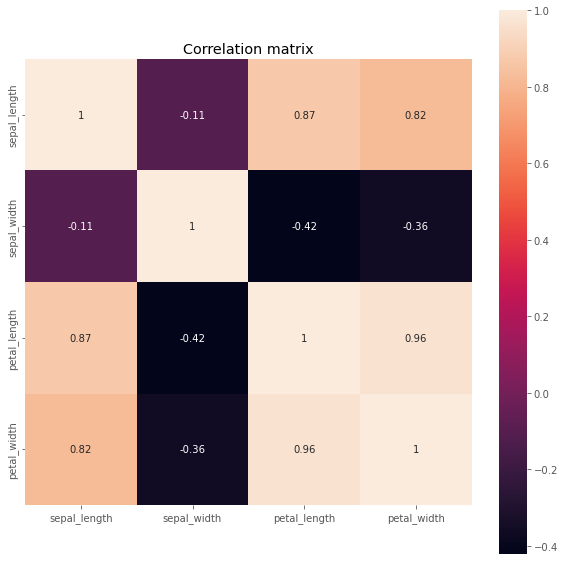

In [64]:
dfNew_corr=dfNew.corr()
values,vectors=np.linalg.eig(dfNew_corr)
plt.figure(figsize=(10,10))
sns.heatmap(dfNew_corr, vmax=1, square=True,annot=True)
plt.title('Correlation matrix')

In [65]:
values,vectors

(array([2.91081808, 0.92122093, 0.14735328, 0.02060771]),
 array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]))

We can prove this by looking at the covariance matrix. It has the property that it is symmetric. We also constrain the each of the columns (eigenvectors) such that the values sum to one. Thus, they are orthonormal to each other.

Eigendecomposition of the covriance matrix:  $Σ = W\wedge W^{-1}$

In [66]:
B=dfNew_corr.dot(vectors[:,0])
print(B)
C=vectors[:,0]*values[0]
print(C)

sepal_length    1.520529
sepal_width    -0.766578
petal_length    1.691925
petal_width     1.646391
dtype: float64
[ 1.52052876 -0.76657825  1.69192467  1.64639087]


### Task 6: Singular Value Decomposition (SVD)
---

In [67]:
a,b,c = np.linalg.svd(dfNew_corr)
values2, vectors2 = b, a
values2, vectors2

(array([2.91081808, 0.92122093, 0.14735328, 0.02060771]),
 array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
        [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
        [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
        [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]]))

### Task 7: Picking Principal Components Using the Explained Variance
---

Text(0.5, 0, 'Dimensions')

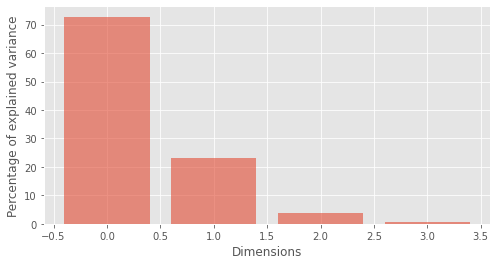

In [68]:
explained_variance=(values / np.sum(values))*100
plt.figure(figsize=(8,4))
plt.bar(range(4), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

In [69]:
pc1 = dfNew.dot(vectors[:,0])
pc2 = dfNew.dot(vectors[:,1])
pc1

0     -2.264542
1     -2.086426
2     -2.367950
3     -2.304197
4     -2.388777
         ...   
145    1.870522
146    1.558492
147    1.520845
148    1.376391
149    0.959299
Length: 150, dtype: float64

### Task 8: Project Data Onto Lower-Dimensional Linear Subspace
---

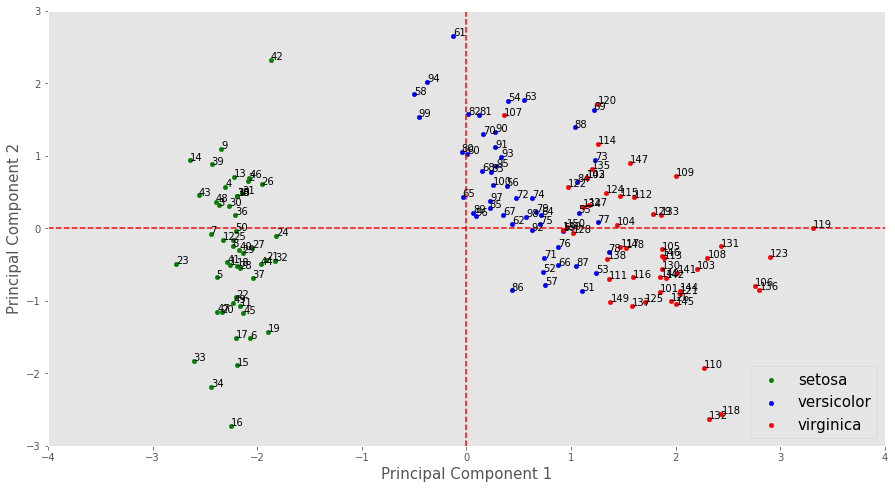

In [70]:
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    
    species_unique = list(set(species))
    species_colors = ["r","b","g"]
    
    for i, spec in enumerate(species):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20, c=species_colors[species_unique.index(spec)])
        ax.annotate(str(i+1), (pc1[i],pc2[i]))
    
    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="red", linestyle="--")
    ax.axvline(x=0, color="red", linestyle="--")
    
    plt.grid()
    plt.axis([-4, 4, -3, 3])
    plt.show()
    
plot_scatter(pc1, pc2)